In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
# import pydotplus
# from pydotplus import graph_from_dot_data
# from sklearn.tree import export_graphviz

In [2]:
# data_1=[[5,40,1.1],[7,60,1.3],[21,140,1.7],[30,120,1.8]]
data_1=[[5,20,1.1],[7,30,1.3],[21,70,1.7],[30,60,1.8]]
data=pd.DataFrame(data_1,columns=['age','weight','标签'])
data

,age,weight,标签
0,5,20,1.1
1,7,30,1.3
2,21,70,1.7
3,30,60,1.8


In [3]:
X=np.array(data.iloc[:,:-1]).reshape((-1,2))
y=np.array(data.iloc[:,-1]).reshape((-1,1))
tree_reg1 = DecisionTreeRegressor(max_depth=2,random_state=10)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=10)

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.082\nsamples = 4\nvalue = 1.475'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.01\nsamples = 2\nvalue = 1.2'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.1'),
 Text(0.375, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 1.3'),
 Text(0.75, 0.5, 'x[0] <= 25.5\nsquared_error = 0.003\nsamples = 2\nvalue = 1.75'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.7'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.8')]

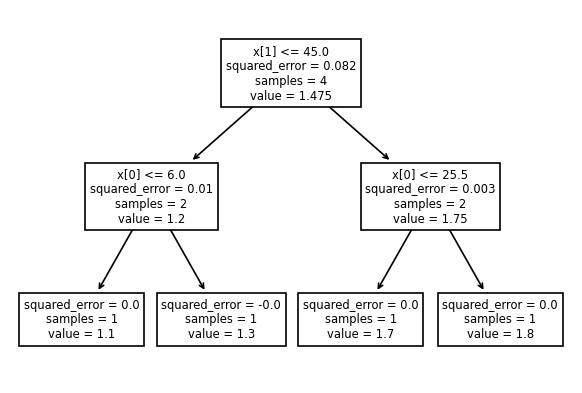

In [4]:
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(tree_reg1)

# GBDT 示例

## 1.初始化弱学习器

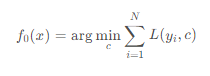

In [5]:
f0 = y.mean()  #1.475

## 2.重复迭代过程：

### 1）对每个样本i = 1 , 2 , … , N ，计算负梯度，即残差:

In [6]:
# 残差
y1 = y - f0
y1

array([[-0.375],
       [-0.175],
       [ 0.225],
       [ 0.325]])

### 2）将残差作为标签建立决策树

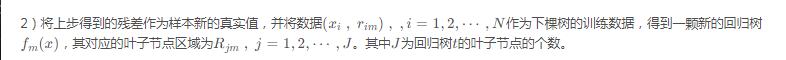

#### 第一次迭代：建第1颗cart回归树

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.082\nsamples = 4\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.01\nsamples = 2\nvalue = -0.275'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.375'),
 Text(0.375, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = -0.175'),
 Text(0.75, 0.5, 'x[0] <= 25.5\nsquared_error = 0.002\nsamples = 2\nvalue = 0.275'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.225'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.325')]

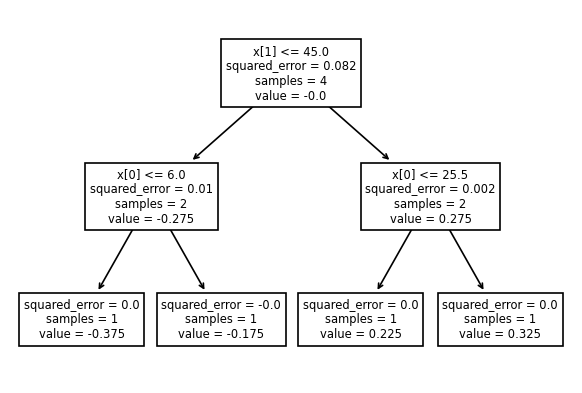

In [7]:
tree_reg1 = DecisionTreeRegressor(max_depth=2,random_state=10)
tree_reg1.fit(X, y1)
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(tree_reg1)

In [8]:
tree_reg1.predict(X)

array([-0.375, -0.175,  0.225,  0.325])

> 模型 = f0+ learning_rate * yr_pred(残差模型预测值）

In [9]:
y1_pred = f0  + 0.1*tree_reg1.predict(X)
y1_pred

array([1.4375, 1.4575, 1.4975, 1.5075])

#### 第二次迭代：建第2颗cart回归树

> 第二次残差 = 第一个模型的残差标签 - learning_rate * 第一个残差模型预测值

> 注意：之所以有残差，是因为将预测值 * 学习率，如果不乘学习率，预测模型的结果会跟标签相同，那么会没有残差。

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.066\nsamples = 4\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.008\nsamples = 2\nvalue = -0.248'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.338'),
 Text(0.375, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = -0.158'),
 Text(0.75, 0.5, 'x[0] <= 25.5\nsquared_error = 0.002\nsamples = 2\nvalue = 0.247'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.202'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.292')]

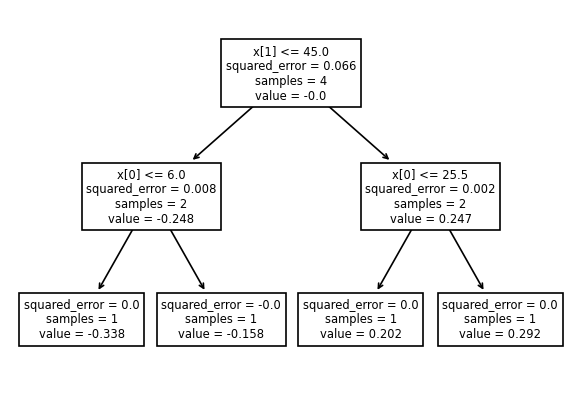

In [10]:
y2 = y1 - 0.1*np.array(tree_reg1.predict(X)).reshape((-1,1))
tree_reg2 = DecisionTreeRegressor(max_depth=2,random_state=10)
tree_reg2.fit(X, y2)
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(tree_reg2)

In [11]:
tree_reg2.predict(X)

array([-0.3375, -0.1575,  0.2025,  0.2925])

In [12]:
y2_pred = f0+ 0.1*tree_reg1.predict(X) + 0.1*tree_reg2.predict(X)
y2_pred

array([1.40375, 1.44175, 1.51775, 1.53675])

#### 第三次迭代：建第3颗cart回归树

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.054\nsamples = 4\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.007\nsamples = 2\nvalue = -0.223'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.304'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.142'),
 Text(0.75, 0.5, 'x[1] <= 65.0\nsquared_error = 0.002\nsamples = 2\nvalue = 0.223'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.263'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 0.182')]

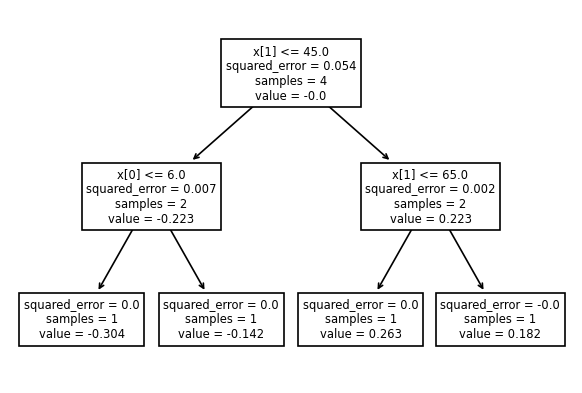

In [13]:
y3 = y2 - 0.1*np.array(tree_reg2.predict(X)).reshape((-1,1))
tree_reg3 = DecisionTreeRegressor(max_depth=2,random_state=10)
tree_reg3.fit(X, y3)
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(tree_reg3)

In [14]:
tree_reg3.predict(X)

array([-0.30375, -0.14175,  0.18225,  0.26325])

In [15]:
y3_pred = f0+ 0.1*tree_reg1.predict(X) + 0.1*tree_reg2.predict(X)+ 0.1*tree_reg3.predict(X)
y3_pred

array([1.373375, 1.427575, 1.535975, 1.563075])

#### 第四次迭代：建第4颗cart回归树

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.044\nsamples = 4\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.005\nsamples = 2\nvalue = -0.2'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.273'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.128'),
 Text(0.75, 0.5, 'x[0] <= 25.5\nsquared_error = 0.001\nsamples = 2\nvalue = 0.2'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.164'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 0.237')]

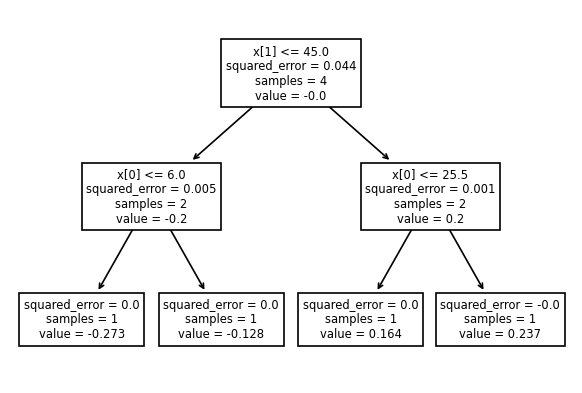

In [16]:
y4 = y3 - 0.1*np.array(tree_reg3.predict(X)).reshape((-1,1))
tree_reg4 = DecisionTreeRegressor(max_depth=2,random_state=10)
tree_reg4.fit(X, y4)
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(tree_reg4)

In [17]:
tree_reg4.predict(X)

array([-0.273375, -0.127575,  0.164025,  0.236925])

In [18]:
y4_pred = f0+ 0.1*tree_reg1.predict(X) + 0.1*tree_reg2.predict(X)+ 0.1*tree_reg3.predict(X)+ 0.1*tree_reg4.predict(X)
y4_pred

array([1.3460375, 1.4148175, 1.5523775, 1.5867675])

#### 第五次迭代：建第5颗cart回归树

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.035\nsamples = 4\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.004\nsamples = 2\nvalue = -0.18'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.246'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.115'),
 Text(0.75, 0.5, 'x[0] <= 25.5\nsquared_error = 0.001\nsamples = 2\nvalue = 0.18'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.148'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 0.213')]

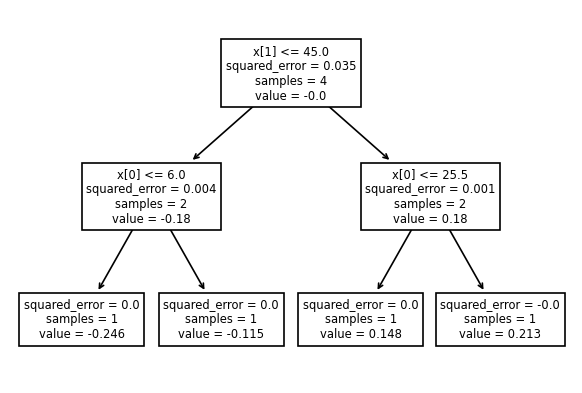

In [19]:
y5 = y4 - 0.1*np.array(tree_reg4.predict(X)).reshape((-1,1))
tree_reg5 = DecisionTreeRegressor(max_depth=2,random_state=10)
tree_reg5.fit(X, y5)
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(tree_reg5)

In [20]:
tree_reg5.predict(X)

array([-0.2460375, -0.1148175,  0.1476225,  0.2132325])

## 3.集成输出结果

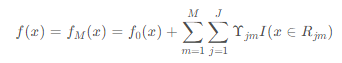

In [21]:
y5_pred = f0+ 0.1*tree_reg1.predict(X) + 0.1*tree_reg2.predict(X)+ 0.1*tree_reg3.predict(X)+ 0.1*tree_reg4.predict(X)+ 0.1*tree_reg5.predict(X)
y5_pred

array([1.32143375, 1.40333575, 1.56713975, 1.60809075])

# sklearn GBDT模型

In [22]:
estimator=GradientBoostingRegressor(criterion="squared_error",n_estimators=5,random_state=10,loss='squared_error') #learning_rate=0.5 最优参数
estimator.fit(data.iloc[:,:-1],data.iloc[:,-1])

GradientBoostingRegressor(criterion='squared_error', n_estimators=5,
                          random_state=10)

In [23]:
estimator.estimators_

array([[DecisionTreeRegressor(max_depth=3,
                              random_state=RandomState(MT19937) at 0x197F03B8640)],
       [DecisionTreeRegressor(max_depth=3,
                              random_state=RandomState(MT19937) at 0x197F03B8640)],
       [DecisionTreeRegressor(max_depth=3,
                              random_state=RandomState(MT19937) at 0x197F03B8640)],
       [DecisionTreeRegressor(max_depth=3,
                              random_state=RandomState(MT19937) at 0x197F03B8640)],
       [DecisionTreeRegressor(max_depth=3,
                              random_state=RandomState(MT19937) at 0x197F03B8640)]],
      dtype=object)

In [24]:
estimator.predict(X)

C:\Users\wangh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.32143375, 1.40333575, 1.56713975, 1.60809075])

In [25]:
# 返回的是生成器，需要用生成器的访问方式查看结果
for y_pred in estimator.staged_predict(X):
    print(y_pred)

[1.4375 1.4575 1.4975 1.5075]
[1.40375 1.44175 1.51775 1.53675]
[1.373375 1.427575 1.535975 1.563075]
[1.3460375 1.4148175 1.5523775 1.5867675]
[1.32143375 1.40333575 1.56713975 1.60809075]


C:\Users\wangh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.082\nsamples = 4\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.01\nsamples = 2\nvalue = -0.275'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.375'),
 Text(0.375, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = -0.175'),
 Text(0.75, 0.5, 'x[0] <= 25.5\nsquared_error = 0.002\nsamples = 2\nvalue = 0.275'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.225'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.325')]

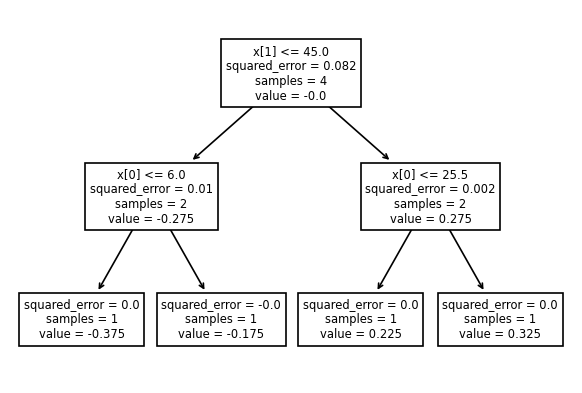

In [26]:
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(estimator.estimators_[0][0])

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.066\nsamples = 4\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.008\nsamples = 2\nvalue = -0.247'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.337'),
 Text(0.375, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = -0.157'),
 Text(0.75, 0.5, 'x[0] <= 25.5\nsquared_error = 0.002\nsamples = 2\nvalue = 0.247'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.202'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 0.292')]

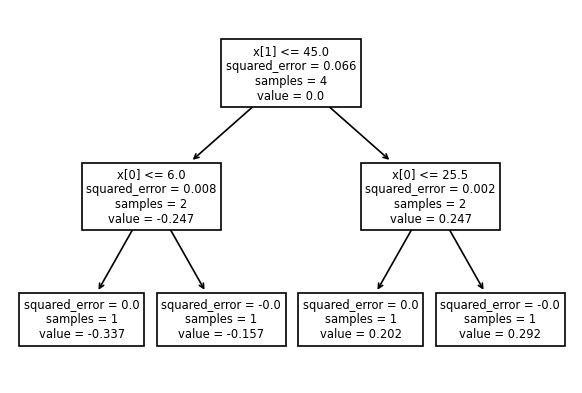

In [27]:
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(estimator.estimators_[1][0])

[Text(0.5, 0.8333333333333334, 'x[1] <= 45.0\nsquared_error = 0.054\nsamples = 4\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[0] <= 6.0\nsquared_error = 0.007\nsamples = 2\nvalue = -0.223'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.304'),
 Text(0.375, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = -0.142'),
 Text(0.75, 0.5, 'x[1] <= 65.0\nsquared_error = 0.002\nsamples = 2\nvalue = 0.223'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 0.263'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 0.182')]

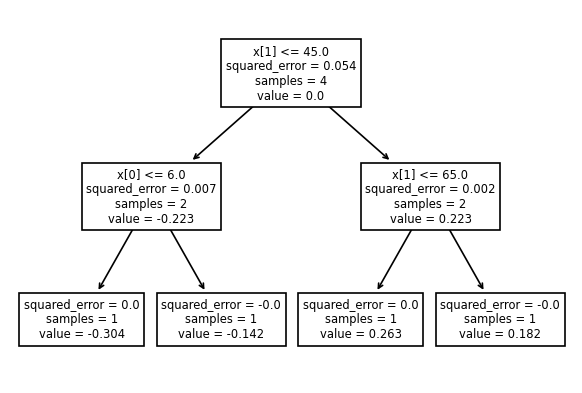

In [28]:
plt.figure(figsize=(6, 4), dpi=120)
tree.plot_tree(estimator.estimators_[2][0])

In [29]:
# plt.figure(figsize=(6, 4), dpi=120)
# tree.plot_tree(tree_reg6)
# dot_data = export_graphviz(estimator.estimators_[5,0], out_file=None, filled=True, rounded=True, special_characters=True, precision=4)
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_pdf('estimator.pdf')